In [7]:
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv("../HA_data/distances/esp_similarity/crystals_esp_sim.csv")

In [9]:
df.head()

,p_id,p_id2,distance
0,1eo8_chA,1eo8_chA,0.000
1,1ha0_chA,1eo8_chA,0.077
2,1ha0_chA,1ha0_chA,0.000
3,1hgd_chA,1eo8_chA,0.126
4,1hgd_chA,1ha0_chA,0.063


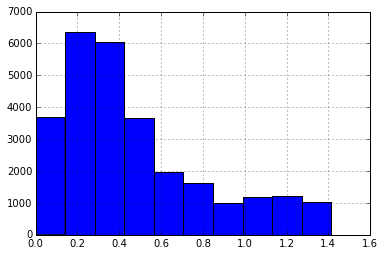

In [10]:
df.distance.hist()

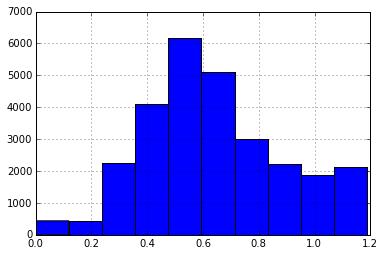

In [11]:
np.sqrt(df.distance).hist()

In [16]:
df = pd.read_csv("../HA_data/distances/sequence_similarity/crystals_seq_sim.csv")

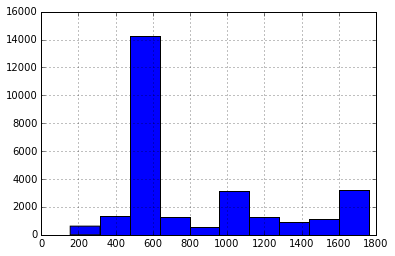

In [17]:
df.distance.hist()

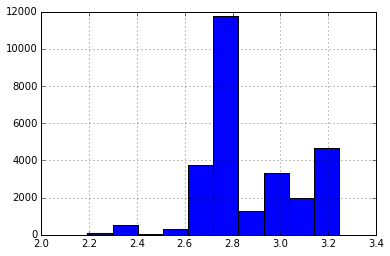

In [18]:
np.log10(df.distance).hist()

In [29]:
df_less = df.rename(columns={"rmsd": "value"}).query("value < 1.5")

In [31]:
df_less.to_csv("../site/data/distance_models_rmsd.csv", index=False)

In [11]:
df2 = pd.read_csv("../HA_data/distances/crystals/crystals_RMSD_tab.csv")  # , index_col="p_id")

In [12]:
df2.head()

,p_id,1eo8,1ha0,1hgd,1hge,1hgf,1hgg,1hgh,1hgi,1hgj,...,4uo5,4uo6,4uo7,4uo8,4uo9,4uoa,4wa1,4wa2,5hmg,reference
0,1eo8,0.00,0.42,0.32,0.32,0.33,0.32,0.33,0.33,0.33,...,0.53,0.55,0.54,0.56,0.57,0.54,0.44,0.44,0.34,1.83
1,1ha0,0.42,0.00,0.39,0.40,0.39,0.40,0.40,0.40,0.39,...,0.61,0.63,0.64,0.63,0.65,0.62,0.52,0.53,0.40,1.82
2,1hgd,0.32,0.39,0.00,0.06,0.13,0.12,0.12,0.12,0.08,...,0.48,0.51,0.51,0.51,0.55,0.52,0.38,0.40,0.22,1.78
3,1hge,0.32,0.40,0.06,0.00,0.13,0.11,0.10,0.10,0.09,...,0.48,0.50,0.50,0.51,0.55,0.53,0.39,0.40,0.22,1.79
4,1hgf,0.33,0.39,0.13,0.13,0.00,0.14,0.14,0.14,0.12,...,0.48,0.52,0.51,0.52,0.56,0.53,0.40,0.42,0.22,1.80


In [24]:
crystals_melted = pd.melt(df2, id_vars="p_id").rename(columns={"variable": "p_id2", "value": "value"}) \
  .query("p_id < p_id2") \
  .query("p_id2 != 'reference'")

In [25]:
crystals_melted

,p_id,p_id2,value
253,1eo8,1ha0,0.42
506,1eo8,1hgd,0.32
507,1ha0,1hgd,0.39
759,1eo8,1hge,0.32
760,1ha0,1hge,0.40
761,1hgd,1hge,0.06
1012,1eo8,1hgf,0.33
1013,1ha0,1hgf,0.39
1014,1hgd,1hgf,0.13
1015,1hge,1hgf,0.13


In [26]:
crystals_melted.to_csv("../site/data/distance_crystals_rmsd_full.csv", index=False)

In [27]:
crystals_melted[pd.isnull(crystals_melted.value)]

,p_id,p_id2,value


In [28]:
crystals_melted.value.describe()

count    31626.000000
mean         1.487474
std          0.638520
min          0.000000
25%          1.190000
50%          1.540000
75%          1.750000
max          3.660000
Name: value, dtype: float64